In [2]:
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip uninstall kaggle
# !kaggle competitions download -c sf-crime
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip install seaborn
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip install matplotlib
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip install sklearn
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip install warnings



##### NOTES
### group by X or group by Y or group by X,Y
## get top 5-10 highedt count as location label for visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
pd.options.mode.chained_assignment = None


In [3]:
# df_test = pd.read_csv('sf-crime/test.csv')
df = pd.read_csv('sf-crime/train.csv')

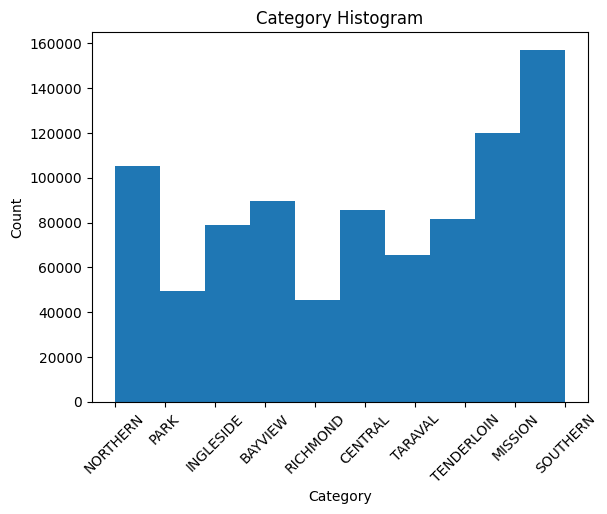

In [4]:
df.head()
plt.title("Category Histogram")
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.hist(df['PdDistrict'])
plt.show()

In [5]:
df.head()

col_name = df.columns
col_vals, na_cols = [], []
row_shape = df.shape[0]
for col in col_name:
    _sum = df[col].isna().sum()
    if not _sum == 0:
        na_cols.append(col)
        col_vals.append(_sum/row_shape)
        
if not na_cols:
    print("there are no missing values; no need to drop values")
else:
    print("there are some missing values... lets do soemthing about it")

there are no missing values; no need to drop values


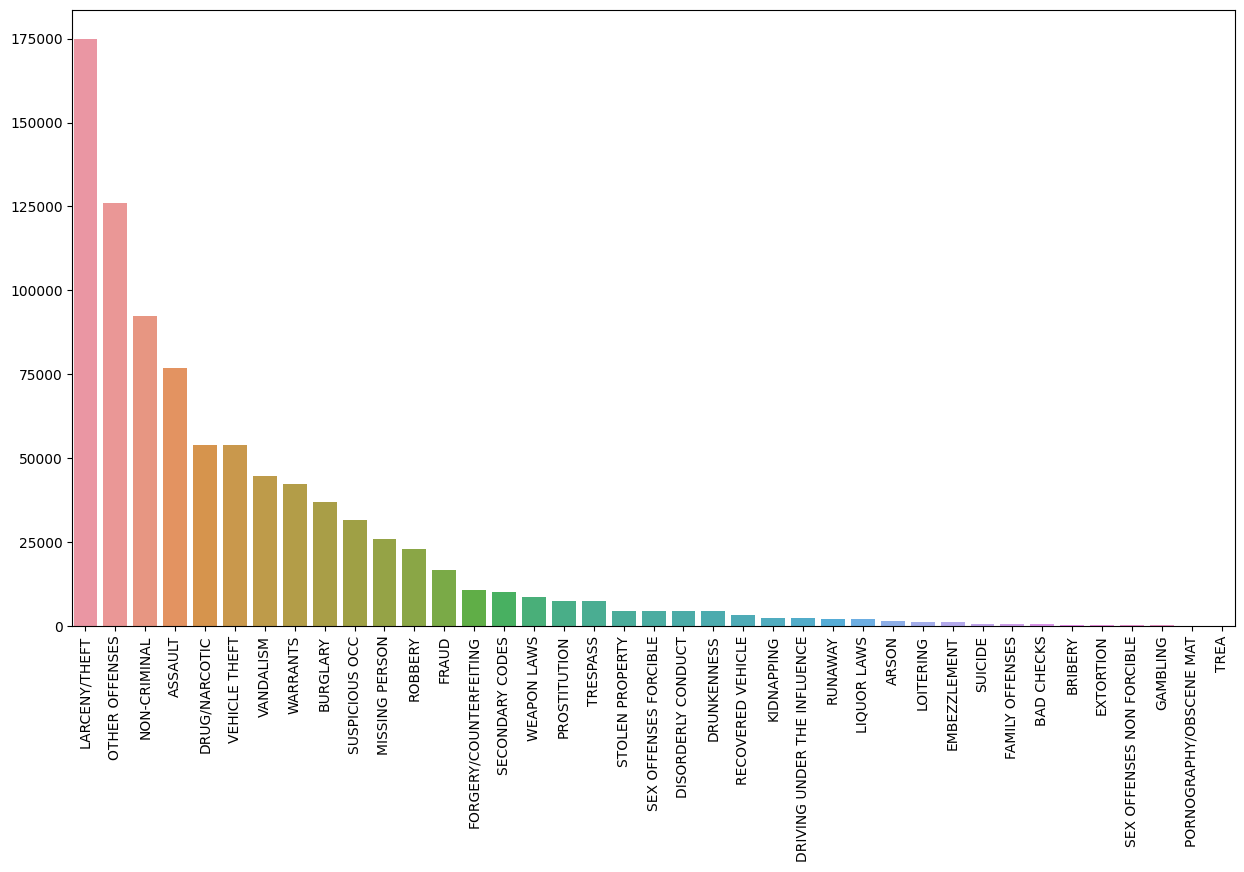

In [6]:
df.head()
from collections import Counter
most_common_crimes = Counter(df["Category"]).most_common()
crime = [i[0] for i in most_common_crimes]
count = [i[1] for i in most_common_crimes]
plt.figure(figsize=(15,8))
ax = sns.barplot(x=crime,y=count)
ax.tick_params(axis ='x',rotation=90)
ax.relim()
ax.margins(x=0.001) 

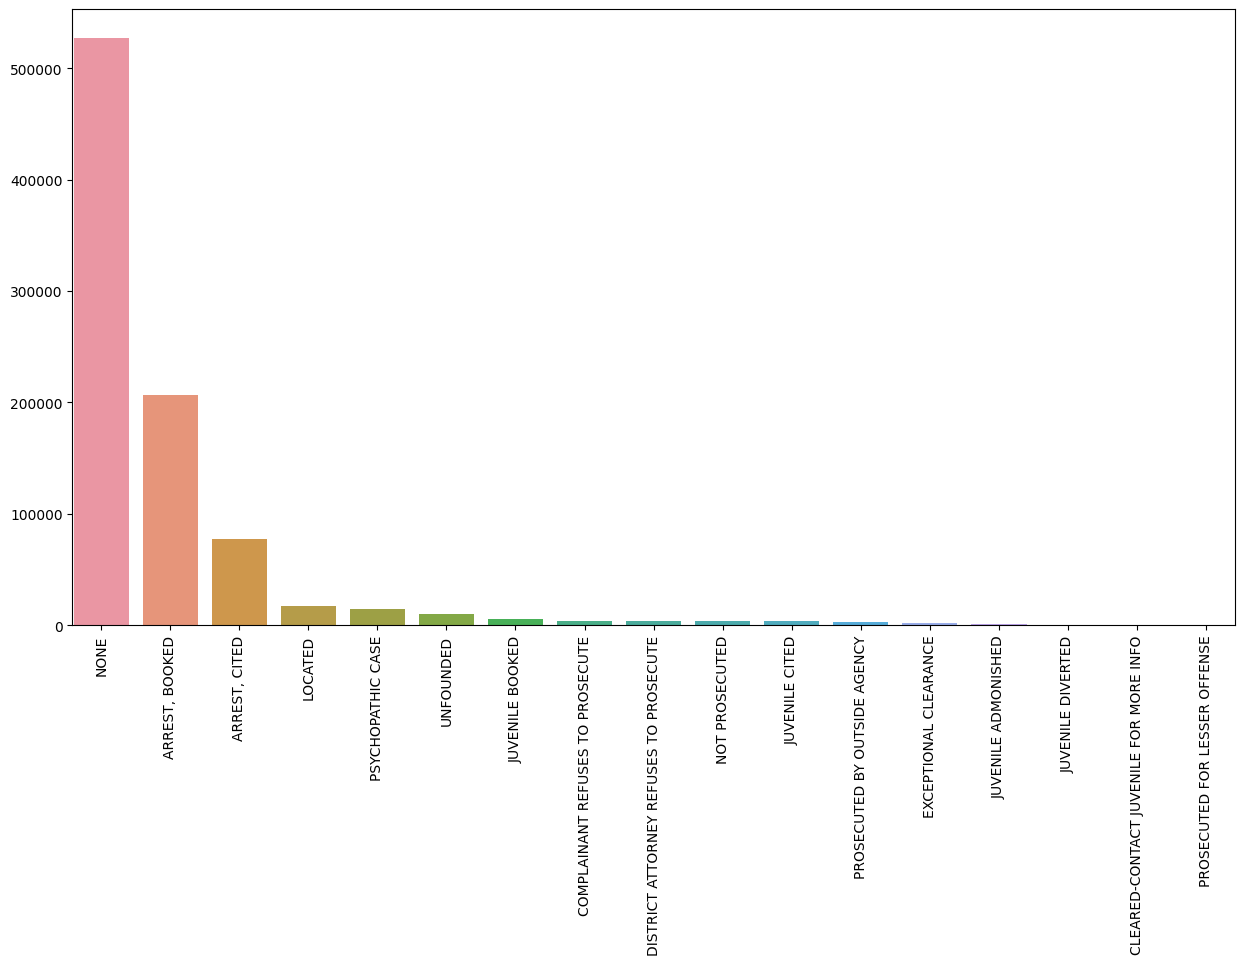

In [21]:
resolutions = Counter(df["Resolution"]).most_common()
resolution = [i[0] for i in resolutions]
res_count = [i[1] for i in resolutions]
plt.figure(figsize=(15,8))
ax1 = sns.barplot(x=resolution,y=res_count)
ax1.tick_params(axis ='x',rotation=90)
ax1.relim()
ax1.margins(x=0.001)

In [7]:
resolutions

[('NONE', 526790),
 ('ARREST, BOOKED', 206403),
 ('ARREST, CITED', 77004),
 ('LOCATED', 17101),
 ('PSYCHOPATHIC CASE', 14534),
 ('UNFOUNDED', 9585),
 ('JUVENILE BOOKED', 5564),
 ('COMPLAINANT REFUSES TO PROSECUTE', 3976),
 ('DISTRICT ATTORNEY REFUSES TO PROSECUTE', 3934),
 ('NOT PROSECUTED', 3714),
 ('JUVENILE CITED', 3332),
 ('PROSECUTED BY OUTSIDE AGENCY', 2504),
 ('EXCEPTIONAL CLEARANCE', 1530),
 ('JUVENILE ADMONISHED', 1455),
 ('JUVENILE DIVERTED', 355),
 ('CLEARED-CONTACT JUVENILE FOR MORE INFO', 217),
 ('PROSECUTED FOR LESSER OFFENSE', 51)]

In [25]:
lat_long_tuples = Counter([(i[0], i[1]) for i in zip(df['X'], df['Y'])]).most_common()
lat_long_tuples



[((-122.403404791479, 37.775420706711), 26354),
 ((-122.41965834371, 37.7642205603745), 4449),
 ((-122.406539115148, 37.7564864109309), 3891),
 ((-122.407633520742, 37.7841893501425), 3170),
 ((-122.419671780296, 37.7650501214668), 3006),
 ((-122.409853729941, 37.7833862379382), 2533),
 ((-122.406520987144, 37.7850629421661), 2329),
 ((-122.466204667893, 37.7725405391593), 2182),
 ((-122.475647460786, 37.7285280627465), 2019),
 ((-122.426955631709, 37.76924706320701), 1991),
 ((-122.407244087032, 37.7865647607685), 1954),
 ((-122.452289660492, 37.72569335757029), 1696),
 ((-122.413564091744, 37.779514030063), 1658),
 ((-122.410768766343, 37.7832145190013), 1626),
 ((-122.394438859914, 37.73644389967321), 1622),
 ((-122.411071423064, 37.7817511307229), 1609),
 ((-122.41029351969, 37.7822305870036), 1605),
 ((-122.413609328985, 37.784696907904), 1491),
 ((-122.414056291891, 37.7827931071006), 1452),
 ((-122.411965795229, 37.78491418595621), 1439),
 ((-122.407845374111, 37.7850943210103),

In [24]:
# import plotly.figure_factory as ff
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
### use wget for the zipfile
# !wget https://www2.census.gov/geo/tiger/TIGER2017//ROADS/tl_2017_06075_roads.zip


In [26]:
with zipfile.ZipFile('tl_2017_06075_roads.zip', 'r') as zip_ref:
    zip_ref.extractall('shapefiles')

In [27]:
geo_df = gpd.read_file('shapefiles/tl_2017_06075_roads.shp')

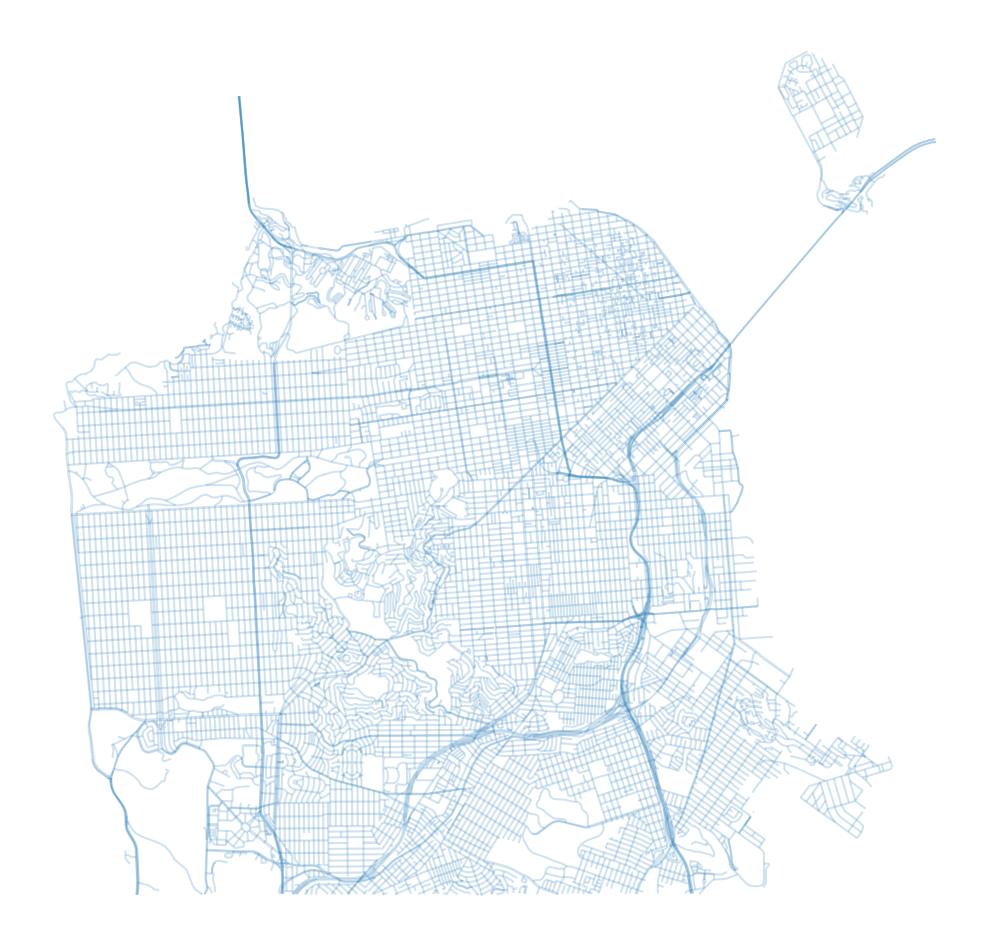

In [28]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .2)
# Turn off axis
ax.set_axis_off()
# Save image
fig.tight_layout()
plt.savefig('shapefile_plot.png');

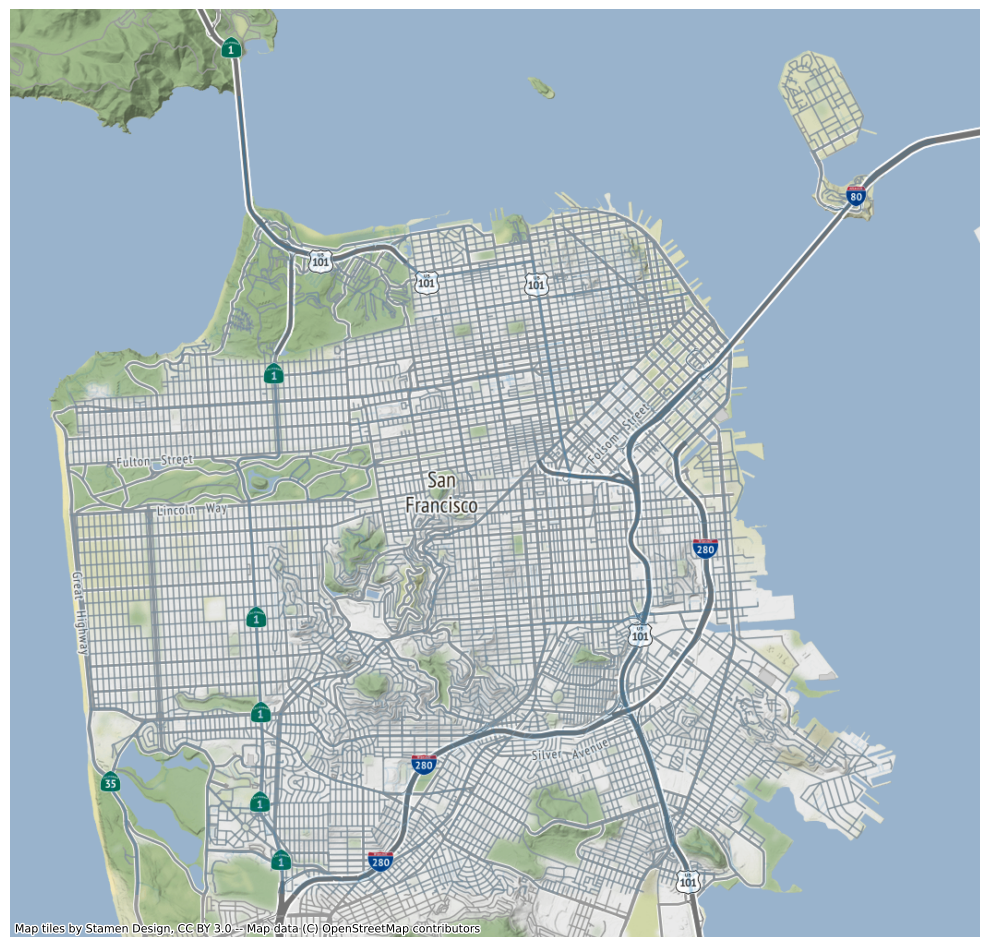

In [30]:
# CREDIT: https://medium.com/@sindhu.ravikumar/visualizing-spatial-data-with-geopandas-and-contextily-10e9b8e71e49
geo_df.crs # output: {'init': 'epsg:4269'}
geo_df = geo_df.to_crs(epsg=3857) # Initialize our plot


fig, ax = plt.subplots(figsize=(10,10)) # Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1) # Add in a background using contextily
ctx.add_basemap(ax) # Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.savefig('contextily_plot.png');


In [42]:
# Clean our data to get the information we want
df_sf = df[['Category', 'Resolution', 'X', 'Y']]
mask = df_sf['Category'] == 'ASSAULT'
df_sf = df_sf[mask] 
df_sf = df_sf[df_sf['Resolution'] == 'ARREST, CITED']
# df_sf = df_sf[df_sf['Resolution'] == 'ARREST, CITED']
df_sf = df_sf.sort_values(by='X')[3:]
df_sf

Category     Resolution           X          Y
822977  ASSAULT  ARREST, CITED -122.509381  37.760270
777170  ASSAULT  ARREST, CITED -122.508619  37.760360
286577  ASSAULT  ARREST, CITED -122.508190  37.754768
623107  ASSAULT  ARREST, CITED -122.507994  37.752795
633865  ASSAULT  ARREST, CITED -122.507934  37.758465
...         ...            ...         ...        ...
814764  ASSAULT  ARREST, CITED -122.364937  37.810204
835739  ASSAULT  ARREST, CITED -122.364937  37.810204
778591  ASSAULT  ARREST, CITED -122.364937  37.810204
830834  ASSAULT  ARREST, CITED -122.364937  37.810204
826866  ASSAULT  ARREST, CITED -122.364937  37.810204

[3544 rows x 4 columns]

In [43]:
df_sf['geometry'] = df_sf.apply(lambda x: Point(float(x.X), float(x.Y)), axis=1)
# Convert Pandas DataFrame to a GeoDataFrame
crimes_geo_df = gpd.GeoDataFrame(df_sf, geometry='geometry')
# Initialize crs to 4326 because that's the format of our geomtry
crimes_geo_df.crs = "EPSG:4326"
# Change the crs to match our SF GeoDataFrame
crimes_geo_df = crimes_geo_df.to_crs(epsg = 3857)

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


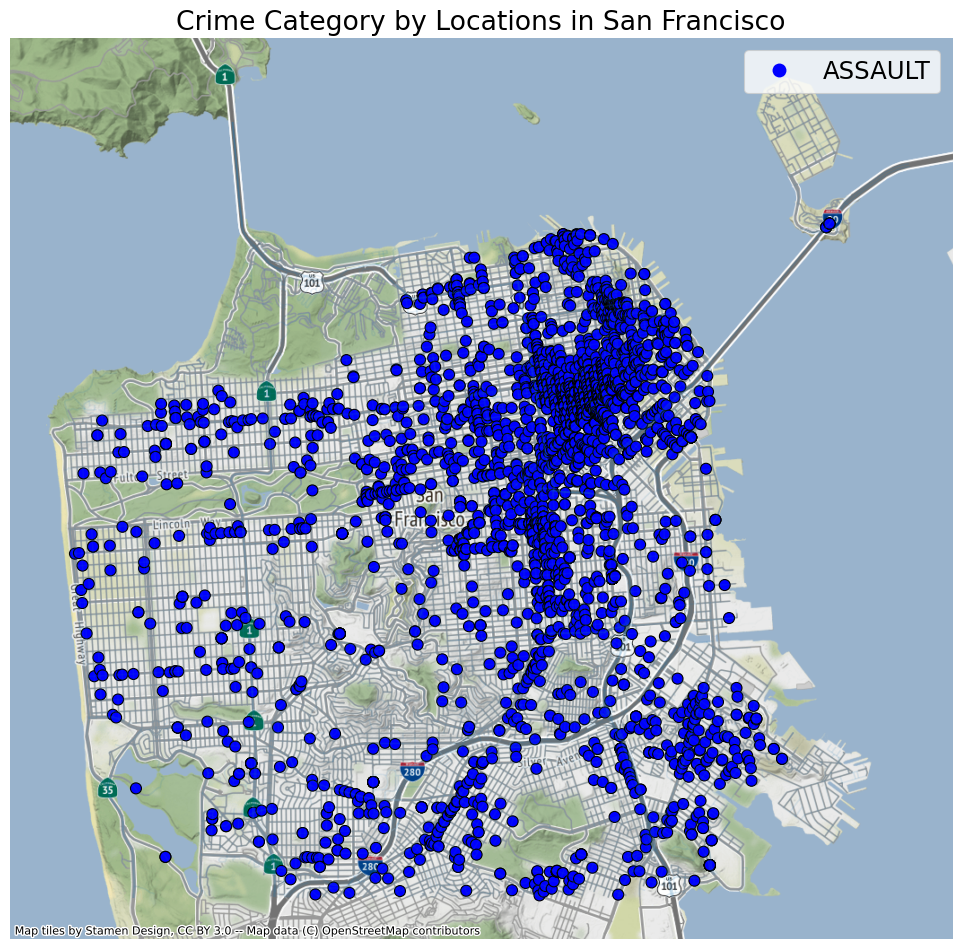

In [47]:
# Change context for readability
sns.set_context("paper", font_scale=2)
# Initialize our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
# Plot our locations
crimes_geo_df.plot(ax=ax, column = 'Category', cmap = 'brg', marker = '.', markersize=250, edgecolor = 'black', legend = True)
# Add in a background using contextily
ctx.add_basemap(ax)
# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.title("Assaults that located by  by Locations in San Francisco")
plt.savefig('Crime_By_Cat.png');

<Figure size 640x480 with 0 Axes>